<a href="https://colab.research.google.com/github/kiannylim/SC1015-Data-Science-Project/blob/main/MachineLearningModel_(resampled).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

## Data Management

Get Data from cleanedDataset.csv

In [58]:
data = pd.read_csv("cleanedResampledSMOTEDataset.csv")

In [59]:
data = data.drop(columns=["Unnamed: 0"])
attritioned = data['Attrition']
data = data.drop(columns=["Attrition"])

In [60]:
attritioned.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [61]:
data.head()

,Age,BusinessTravel,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,2,1,1,2,7,3,2,8,1,8,0,6,4,5
1,49,1,1,2,1,6,1,1,1,0,10,3,10,7,7
2,37,2,4,3,1,2,2,2,6,1,7,3,0,0,0
3,33,1,1,3,2,6,2,1,1,1,8,3,8,7,0
4,27,2,3,0,2,2,1,1,9,0,6,3,2,2,2


## Multi-Variate Classification Tree


In [62]:
X_train, X_test, y_train, y_test = train_test_split(data[list(data)], attritioned, test_size = 0.20)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1972, 15) (1972,)
Test Set  : (494, 15) (494,)


[Text(0.59609375, 0.9285714285714286, 'JobSatisfaction <= 2.5\ngini = 0.5\nsamples = 1972\nvalue = [982, 990]\nclass = Yes'),
 Text(0.3546875, 0.7857142857142857, 'JobInvolvement <= 1.5\ngini = 0.486\nsamples = 1551\nvalue = [648, 903]\nclass = Yes'),
 Text(0.159375, 0.6428571428571429, 'EnvironmentSatisfaction <= 2.5\ngini = 0.389\nsamples = 727\nvalue = [192, 535]\nclass = Yes'),
 Text(0.06875, 0.5, 'Age <= 33.5\ngini = 0.328\nsamples = 619\nvalue = [128, 491]\nclass = Yes'),
 Text(0.0375, 0.35714285714285715, 'YearsInCurrentRole <= 10.0\ngini = 0.202\nsamples = 369\nvalue = [42, 327]\nclass = Yes'),
 Text(0.025, 0.21428571428571427, 'YearsAtCompany <= 3.5\ngini = 0.194\nsamples = 367\nvalue = [40, 327]\nclass = Yes'),
 Text(0.0125, 0.07142857142857142, 'gini = 0.126\nsamples = 237\nvalue = [16, 221]\nclass = Yes'),
 Text(0.0375, 0.07142857142857142, 'gini = 0.301\nsamples = 130\nvalue = [24, 106]\nclass = Yes'),
 Text(0.05, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 

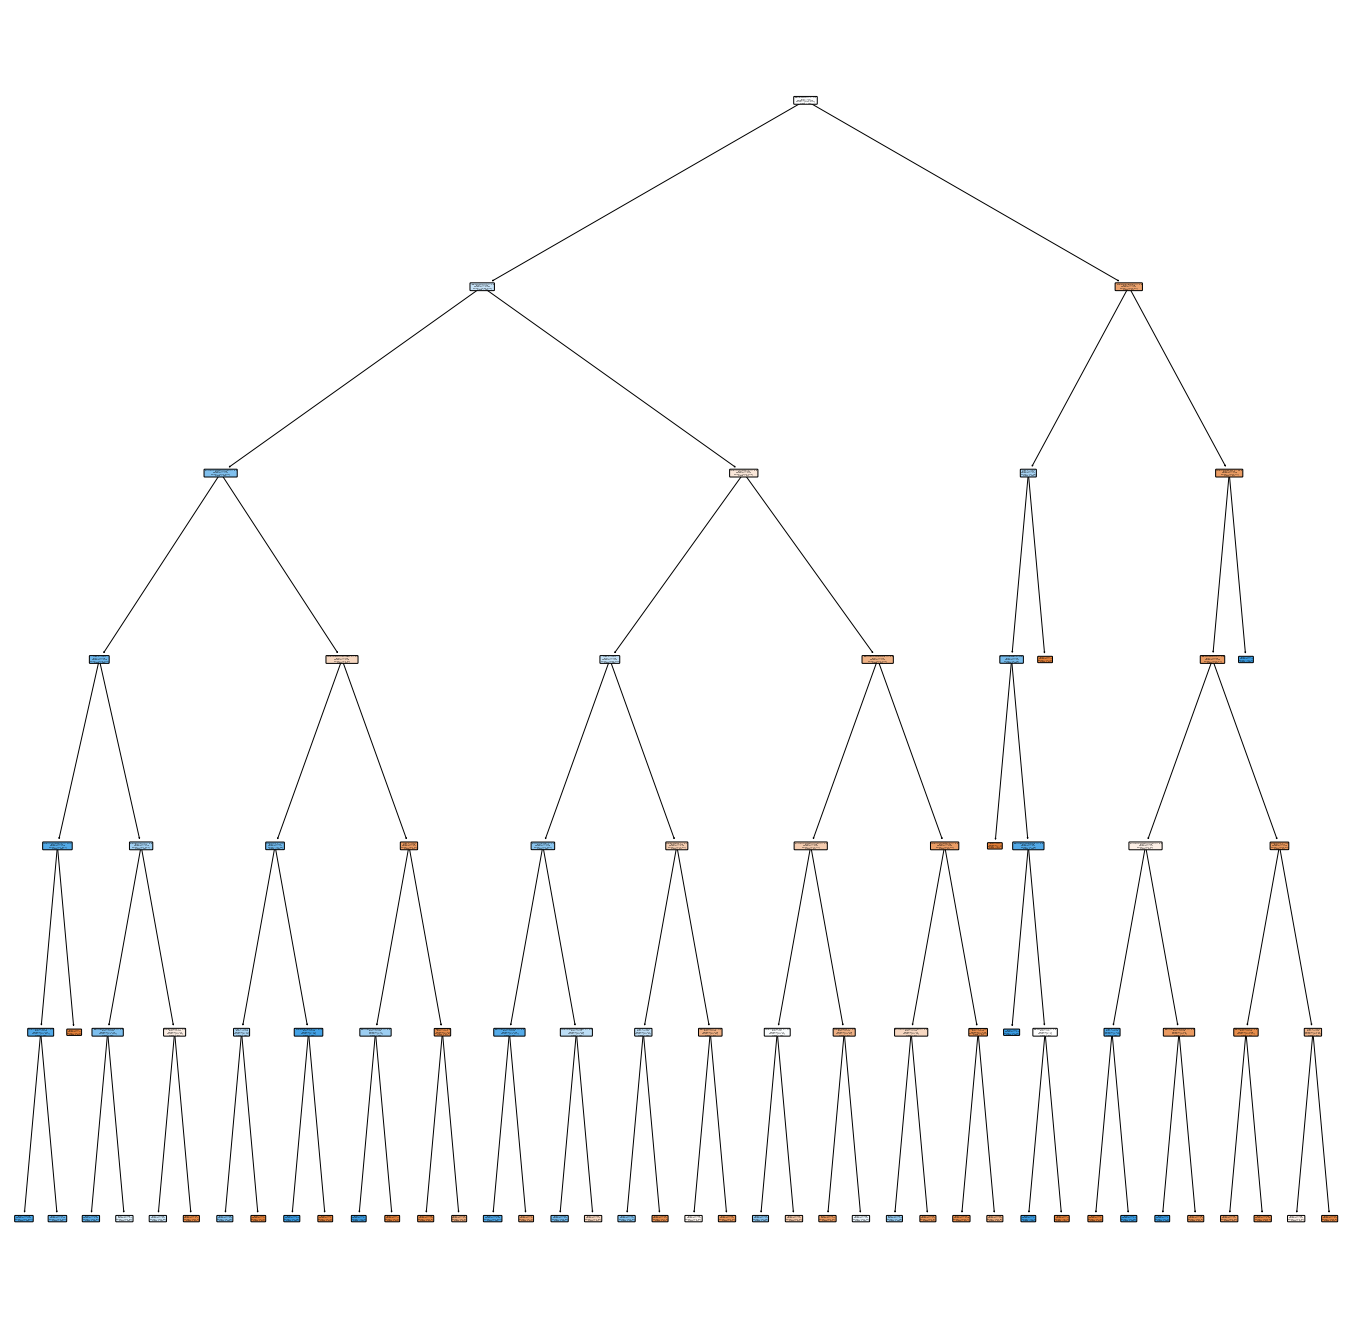

In [63]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"])

Train Data
Accuracy  :	 0.8169371196754563

TPR Train :	 0.8242424242424242
TNR Train :	 0.8095723014256619

FPR Train :	 0.19042769857433808
FNR Train :	 0.17575757575757575


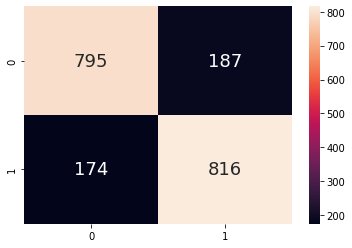

In [64]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7449392712550608

TPR Test :	 0.7407407407407407
TNR Test :	 0.749003984063745

FPR Test :	 0.250996015936255
FNR Test :	 0.25925925925925924


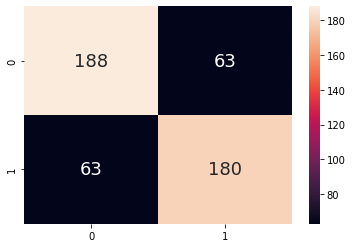

In [65]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Random Forest Classifier

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data[list(data)], attritioned, test_size = 0.20)

In [67]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

Train Data
Accuracy  :	 0.8448275862068966

TPR Train :	 0.8082744702320888
TNR Train :	 0.8817533129459735

FPR Train :	 0.11824668705402651
FNR Train :	 0.1917255297679112


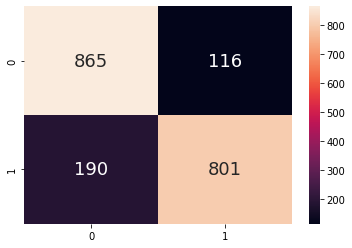

In [68]:
# Predict the Response corresponding to Predictors
y_train_pred = clf.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", clf.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.757085020242915

TPR Train :	 0.7107438016528925
TNR Train :	 0.8015873015873016

FPR Train :	 0.1984126984126984
FNR Train :	 0.2892561983471074


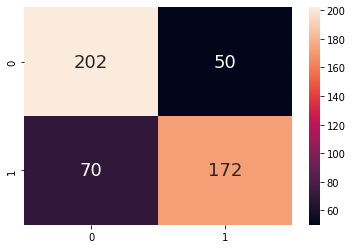

In [69]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", clf.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [70]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [71]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [72]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [73]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=200, max_depth=8, criterion = "gini", max_features = 'sqrt', random_state = 18)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200,
                       random_state=18)

Train Data
Accuracy  :	 0.9543610547667343

TPR Train :	 0.9495459132189707
TNR Train :	 0.9592252803261978

FPR Train :	 0.040774719673802244
FNR Train :	 0.050454086781029264


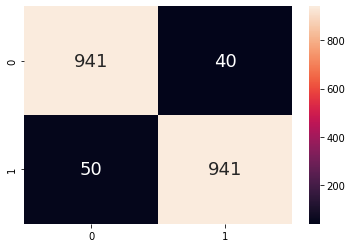

In [74]:
# Predict the Response corresponding to Predictors
y_train_pred = clf2.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", clf2.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8238866396761133

TPR Train :	 0.8016528925619835
TNR Train :	 0.8452380952380952

FPR Train :	 0.15476190476190477
FNR Train :	 0.19834710743801653


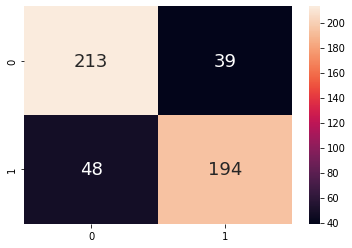

In [75]:
# Predict the Response corresponding to Predictors
y_test_pred = clf2.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", clf2.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Feature Importances

<BarContainer object of 15 artists>

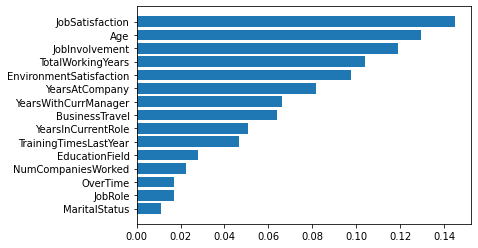

In [76]:
names = pd.DataFrame(list(data), columns = ["FeatureNames"])
features = pd.DataFrame(clf.feature_importances_, columns = ["Importances"])
newdata = pd.concat([names, features], axis = 1).sort_values(by=["Importances"], ascending = True)
plt.barh(newdata["FeatureNames"], newdata["Importances"])